### *Stock Market Prediction Using stacked LSTM*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r"C:\Users\OmkarRPrabhu\OneDrive - iitgn.ac.in\Desktop\Projects\Stock_Price_Prediction_NVDA\NVDA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,4.114500,4.147750,4.081250,4.104250,4.084733,296140000
1,2019-09-04,4.165250,4.226500,4.165250,4.219000,4.198936,227728000
2,2019-09-05,4.321750,4.499750,4.320000,4.493500,4.472132,695676000
3,2019-09-06,4.470000,4.527250,4.428000,4.466250,4.445012,376976000
4,2019-09-09,4.497500,4.599500,4.496000,4.512500,4.491042,417524000
...,...,...,...,...,...,...,...
1253,2024-08-26,129.570007,131.259995,124.370003,126.459999,126.459999,331964700
1254,2024-08-27,125.050003,129.199997,123.879997,128.300003,128.300003,303134600
1255,2024-08-28,128.119995,128.330002,122.639999,125.610001,125.610001,448101100
1256,2024-08-29,121.360001,124.430000,116.709999,117.589996,117.589996,453023300


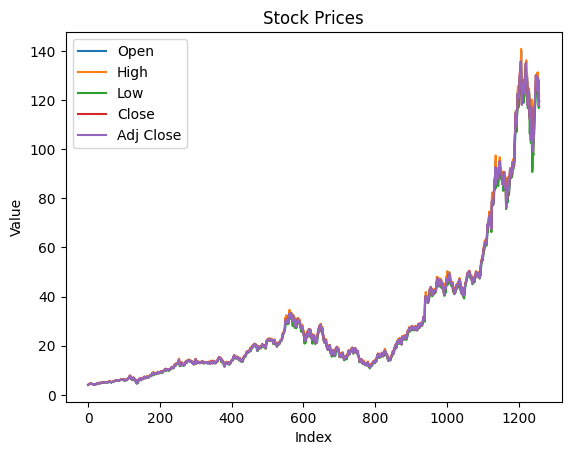

In [3]:
# Plot each column with a label for the legend
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')
plt.plot(df['Adj Close'], label='Adj Close')

# Add a legend to the plot
plt.legend()

# Optionally, add labels and a title for clarity
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Stock Prices')

# Display the plot
plt.show()


In [4]:
df = df.reset_index()['Close']

In [5]:
df.shape

(1258,)

##### *LSTM's are sensitive to the scale of the date. OS we apply the MinMax Scaler* 

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))  # to make the data value only between 0 to 1
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df

array([[0.00000000e+00],
       [8.72784512e-04],
       [2.96062197e-03],
       ...,
       [9.24168519e-01],
       [8.63168640e-01],
       [8.76707311e-01]])

##### *Splitting into Train and Test dataset* 


In [7]:
train_data_size = int(len(df)*0.7)

train_data , test_data = df[0:train_data_size , :] , df[train_data_size:len(df) , :]

df.size , train_data.size , test_data.size , train_data.size + test_data.size

(1258, 880, 378, 1258)

##### *Creating the Dataset*
- Let us suppose we have the data as 100, 120, 130, 140, 135, 144, 166, 123, 122.
- Then, if we consider the timesteps to be 3.
- `X_train` would be like:

\begin{bmatrix}
100 & 120 & 130 \\
120 & 130 & 140 \\
130 & 140 & 135 \\
140 & 135 & 144 \\
135 & 144 & 166 \\
144 & 166 & 123 \\
166 & 123 & 122
\end{bmatrix}


- And `y_train` would be like:

\begin{bmatrix}
140 \\
135 \\
144 \\
166 \\
123 \\
122
\end{bmatrix}



In [8]:
def create_dataset(dataset , timesteps) :
    X_train = [] 
    Y_train = [] 
    for i in range(len(dataset)-timesteps-1) : 
        X_train.append(dataset[i:timesteps+i]) 
        Y_train.append(dataset[timesteps+i+1])
    return np.array(X_train) , np.array(Y_train) 

In [9]:
timesteps = 100 
X_train , Y_train = create_dataset(train_data , timesteps) 
X_test , Y_test = create_dataset(test_data , timesteps) 

#### *LSTM Model*

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [11]:
model = Sequential() 
model.add(LSTM(50 , return_sequences = True , input_shape = (100 ,1)))
model.add(LSTM(50 , return_sequences = True))
model.add(LSTM(50 , return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

c:\Users\OmkarRPrabhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(X_train , Y_train , validation_data=(X_test , Y_test), epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0043 - val_loss: 0.1238
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 7.5135e-04 - val_loss: 0.0484
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 3.0769e-04 - val_loss: 0.0162
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 3.6672e-04 - val_loss: 0.0304
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.0812e-04 - val_loss: 0.0291
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 2.7205e-04 - val_loss: 0.0326
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.8062e-04 - val_loss: 0.0375
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 2.8423e-04 - val_loss: 0.0287
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 2.4794e-04 - val_loss: 0.0376
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.9674e-04 - val_loss: 0.0311
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.3805e-04 - val_loss: 0.0383
Epoch 12/10

In [14]:
predicted = model.predict(X_test)
predicted

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


array([[0.28248897],
       [0.2777082 ],
       [0.27812394],
       [0.28327554],
       [0.29085696],
       [0.29783788],
       [0.29946643],
       [0.29541114],
       [0.2885399 ],
       [0.2829691 ],
       [0.2797922 ],
       [0.27619764],
       [0.2711477 ],
       [0.26392025],
       [0.25953102],
       [0.2606836 ],
       [0.26592484],
       [0.27221078],
       [0.27704397],
       [0.28371066],
       [0.29115012],
       [0.29876176],
       [0.305103  ],
       [0.30733773],
       [0.30586842],
       [0.30476704],
       [0.30647013],
       [0.31053552],
       [0.3139173 ],
       [0.31481662],
       [0.31138438],
       [0.30369568],
       [0.29362428],
       [0.2838616 ],
       [0.27656284],
       [0.27369902],
       [0.27539176],
       [0.27804738],
       [0.27950603],
       [0.2789146 ],
       [0.27537847],
       [0.2685377 ],
       [0.26101208],
       [0.25615132],
       [0.25487414],
       [0.25707725],
       [0.2621023 ],
       [0.268

In [15]:
train_predict  = model.predict(X_train)
test_predict = model.predict(X_test)  

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [16]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [17]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train , train_predict)) , math.sqrt(mean_squared_error(Y_test , test_predict))


(16.987353199720093, 66.4094059851122)

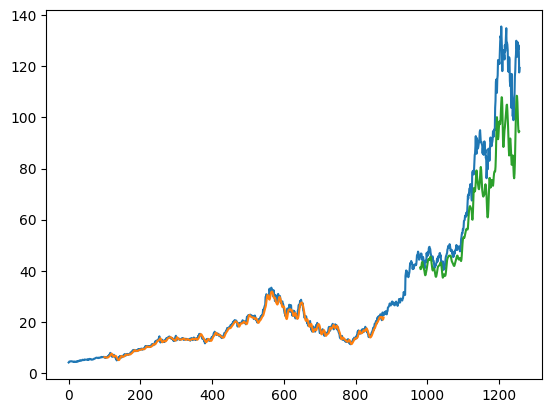

In [18]:

# Shifting the train predictions for plotting 
look_back = 100 
trainPredictPlot = np.empty_like(df)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# Shifting the test predictions for plotting 
testPredictPlot = np.empty_like(df)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict


#Plot 
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### -----------------------------------------------------------------

In [19]:
from keras.layers import GRU
model1 = Sequential() 
model1.add(GRU(50, return_sequences=True, input_shape=(100, 1)))
model1.add(GRU(50, return_sequences=True))
model1.add(GRU(50, return_sequences=True))
model1.add(GRU(50, return_sequences=True))
model1.add(GRU(50))
model1.add(Dense(1))
model1.compile(loss = 'mean_squared_error' , optimizer = 'adam')

c:\Users\OmkarRPrabhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,201 (270.32 KB)

 Trainable params: 69,201 (270.32 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model1.fit(X_train , Y_train , validation_data=(X_test , Y_test), epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 0.0053 - val_loss: 0.1264
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0012 - val_loss: 0.0150
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 3.0617e-04 - val_loss: 0.0055
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 1.9127e-04 - val_loss: 0.0085
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 1.2579e-04 - val_loss: 0.0057
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 1.1612e-04 - val_loss: 0.0075
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 1.4360e-04 - val_loss: 0.0085
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 1.2465e-04 - val_loss: 0.0058
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 1.1731e-04 - val_loss: 0.0065
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 1.1667e-04 - val_loss: 0.0049
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 1.3496e-04 - val_loss: 0.0066
Epoch

In [22]:
train_predict_gru  = model1.predict(X_train)
test_predict_gru = model1.predict(X_test)  

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [23]:
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

In [24]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train , train_predict_gru)) , math.sqrt(mean_squared_error(Y_test , test_predict_gru))


(17.69912739295023, 72.63792614883687)

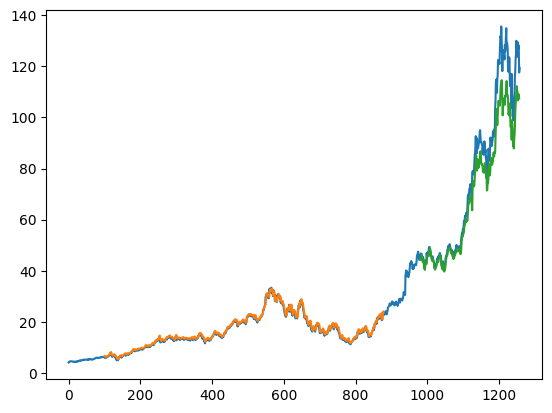

In [25]:

# Shifting the train predictions for plotting 
look_back = 100 
trainPredictPlot = np.empty_like(df)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back:len(train_predict_gru)+look_back, :] = train_predict_gru


# Shifting the test predictions for plotting 
testPredictPlot = np.empty_like(df)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict_gru)+(look_back*2)+1:len(df)-1, :] = test_predict_gru


#Plot 
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
